Estimated Percolation Threshold: 0.2651133980358984


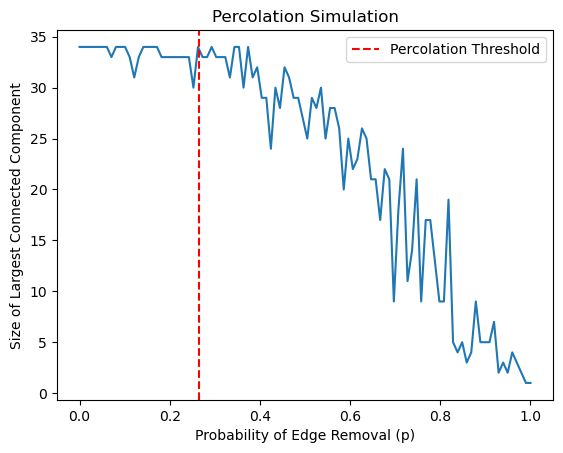

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_edge_removal(G, p):
    # Create a copy of the original graph
    G_copy = G.copy()
    
    # Get the list of edges
    edges = list(G_copy.edges())
    
    # Randomly remove edges with probability p
    for edge in edges:
        if np.random.rand() < p:
            G_copy.remove_edge(*edge)
    
    return G_copy

def percolation_threshold(G, num_simulations=100):
    # Perform multiple simulations to estimate the percolation threshold
    threshold_sum = 0
    
    for _ in range(num_simulations):
        # Randomly select a probability threshold
        p = np.random.rand()
        
        # Simulate edge removal
        G_removed = simulate_edge_removal(G, p)
        
        # Calculate the size of the largest connected component
        largest_cc = max(len(cc) for cc in nx.connected_components(G_removed))
        
        # Update threshold sum
        threshold_sum += p * largest_cc / len(G)
    
    # Calculate average threshold
    avg_threshold = threshold_sum / num_simulations
    
    return avg_threshold

# Example usage:
# Load a real graph (replace this with your real graph)
G_real = nx.karate_club_graph()

# Estimate the percolation threshold
threshold = percolation_threshold(G_real)
print("Estimated Percolation Threshold:", threshold)

# Plot percolation threshold on a graph
ps = np.linspace(0, 1, 100)
largest_ccs = []

for p in ps:
    G_removed = simulate_edge_removal(G_real, p)
    largest_cc = max(len(cc) for cc in nx.connected_components(G_removed))
    largest_ccs.append(largest_cc)

plt.plot(ps, largest_ccs)
plt.axvline(x=threshold, color='r', linestyle='--', label='Percolation Threshold')
plt.xlabel('Probability of Edge Removal (p)')
plt.ylabel('Size of Largest Connected Component')
plt.title('Percolation Simulation')
plt.legend()
plt.show()


Estimated Percolation Threshold: 0.24087013089172488
Real Graph Properties:
Degree Distribution: [17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
Clustering Coefficient: 0.5706384782076823
Assortativity: -0.47561309768461413
Homophily: None
Sparsity: 0.13903743315508021

Synthetic Graph Properties (Percolation Simulation):
Degree Distribution: [15, 13, 11, 9, 9, 6, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0]
Clustering Coefficient: 0.5139092933210581
Assortativity: -0.4841819054219755
Homophily: None
Sparsity: 0.11764705882352941


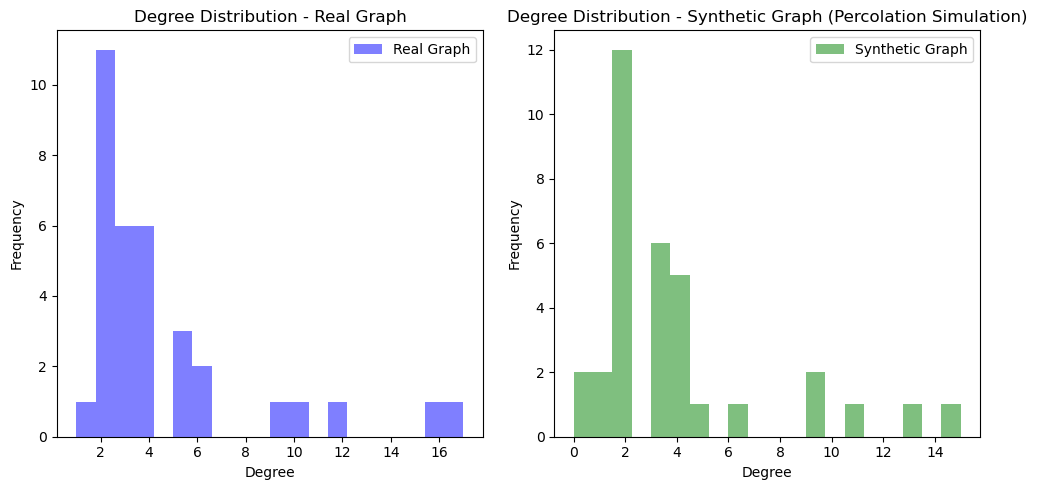

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_edge_removal(G, p):
    # Create a copy of the original graph
    G_copy = G.copy()
    
    # Get the list of edges
    edges = list(G_copy.edges())
    
    # Randomly remove edges with probability p
    for edge in edges:
        if np.random.rand() < p:
            G_copy.remove_edge(*edge)
    
    return G_copy

def percolation_threshold(G, num_simulations=100):
    # Perform multiple simulations to estimate the percolation threshold
    threshold_sum = 0
    
    for _ in range(num_simulations):
        # Randomly select a probability threshold
        p = np.random.rand()
        
        # Simulate edge removal
        G_removed = simulate_edge_removal(G, p)
        
        # Calculate the size of the largest connected component
        largest_cc = max(len(cc) for cc in nx.connected_components(G_removed))
        
        # Update threshold sum
        threshold_sum += p * largest_cc / len(G)
    
    # Calculate average threshold
    avg_threshold = threshold_sum / num_simulations
    
    return avg_threshold

# Load a real graph (replace this with your real graph)
G_real = nx.karate_club_graph()

# Estimate the percolation threshold
threshold = percolation_threshold(G_real)
print("Estimated Percolation Threshold:", threshold)

# Calculate properties for real graph
degree_sequence_real = sorted([d for n, d in G_real.degree()], reverse=True)
clustering_coefficient_real = nx.average_clustering(G_real)
assortativity_real = nx.degree_assortativity_coefficient(G_real)
homophily_real = None  # You need to define this based on your specific context
sparsity_real = nx.density(G_real)

# Calculate properties for synthetic graph using percolation simulation
G_removed = simulate_edge_removal(G_real, threshold)
degree_sequence_synthetic = sorted([d for n, d in G_removed.degree()], reverse=True)
clustering_coefficient_synthetic = nx.average_clustering(G_removed)
assortativity_synthetic = nx.degree_assortativity_coefficient(G_removed)
homophily_synthetic = None  # You need to define this based on your specific context
sparsity_synthetic = nx.density(G_removed)

# Print properties
print("Real Graph Properties:")
print("Degree Distribution:", degree_sequence_real)
print("Clustering Coefficient:", clustering_coefficient_real)
print("Assortativity:", assortativity_real)
print("Homophily:", homophily_real)
print("Sparsity:", sparsity_real)

print("\nSynthetic Graph Properties (Percolation Simulation):")
print("Degree Distribution:", degree_sequence_synthetic)
print("Clustering Coefficient:", clustering_coefficient_synthetic)
print("Assortativity:", assortativity_synthetic)
print("Homophily:", homophily_synthetic)
print("Sparsity:", sparsity_synthetic)

# Plot degree distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(degree_sequence_real, bins=20, alpha=0.5, color='blue', label='Real Graph')
plt.title('Degree Distribution - Real Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(degree_sequence_synthetic, bins=20, alpha=0.5, color='green', label='Synthetic Graph')
plt.title('Degree Distribution - Synthetic Graph (Percolation Simulation)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
